#  **Data Importing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
from sklearn.metrics import confusion_matrix, classification_report


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
df = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [5]:
df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [6]:
df.drop(columns='Id').describe().style.background_gradient(cmap='pink',axis=None)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000
mean,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,200094.222824,3.924354,6.695679
std,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,111689.098211,0.359520,3.206170
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,0.501650,1.000000,0.000000
25%,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,165445.750000,4.000000,5.000000
50%,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,208941.000000,4.000000,8.000000
75%,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,252247.000000,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1477187.000000,5.000000,10.000000


In [7]:
df.shape

(14396, 18)

**Checking for null values: there is no null values**


In [8]:
missing_count = df.drop(columns='Id').isnull().sum()
missing_count

,0
Artist Name,0
Track Name,0
Popularity,333
danceability,0
energy,0
key,1609
loudness,0
mode,0
speechiness,0
acousticness,0


**Cheking for unique values**

In [9]:
#cheking for unique values in every column so we can study the trends and make visualization
df.drop(columns='Id').nunique()

,0
Artist Name,7913
Track Name,12455
Popularity,100
danceability,887
energy,1156
key,11
loudness,8051
mode,2
speechiness,1177
acousticness,3725


**Checking for duplicates: there is no duplicates**

In [10]:
#Check for duplicate rows
df.duplicated().sum()

0

# **Data Visualization**

**General overview**

array([[<Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_in min/ms'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

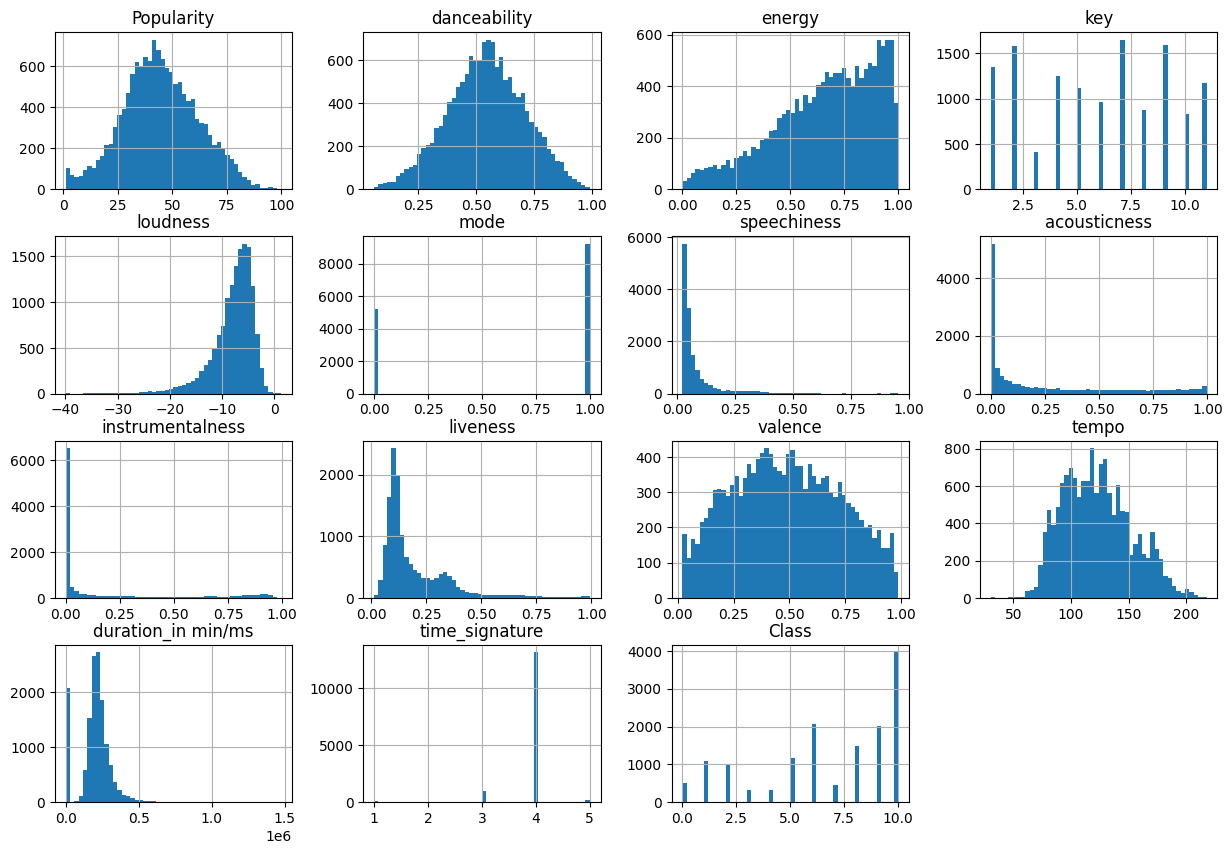

In [11]:
df.drop('Id', axis=1).hist(figsize=(15,10), bins=50)

In [ ]:
attributes = df.drop(columns=['Id', 'Artist Name', 'Track Name'], axis=1).columns
sns.pairplot(data=df[attributes], hue="Class")

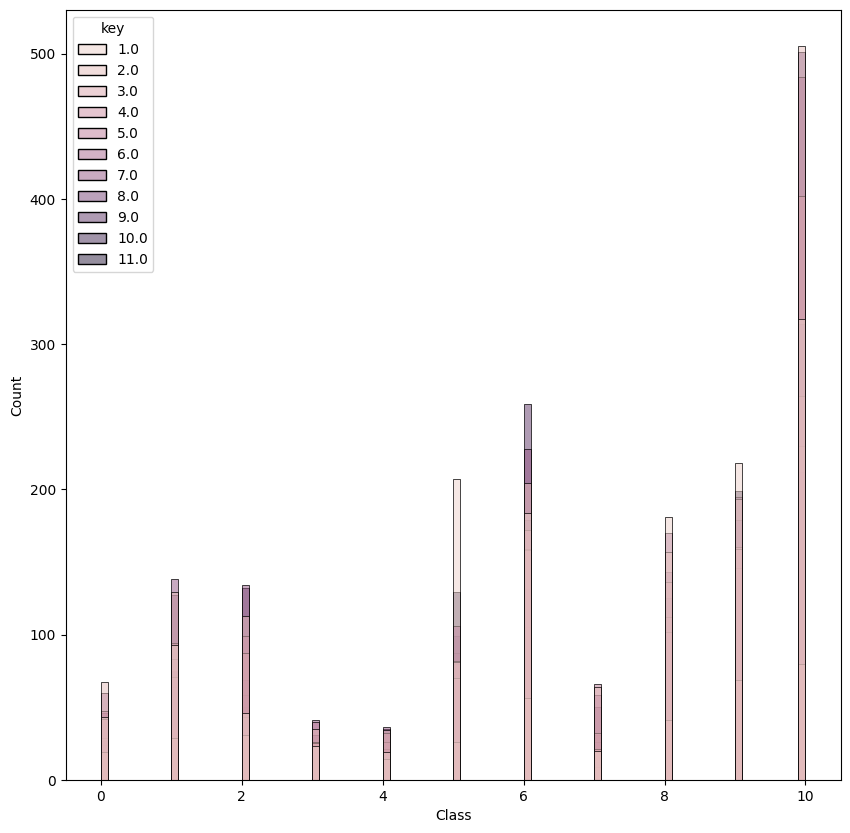

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df, x='Class', hue='key', label='Music Genre', bins=100)

**Categorical columns visualization**

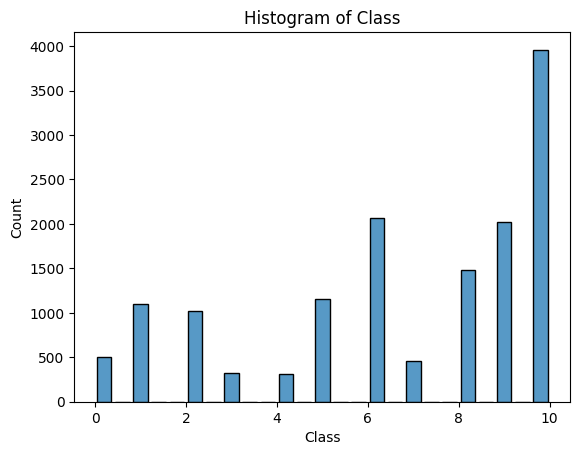

In [ ]:
sns.histplot(data=df, x='Class', shrink=0.8)
plt.title('Histogram of Class')
plt.ylabel('Count')
plt.show()



**Dealing with outliers**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
# Outliers overview based on boxplot, according to clarity categories.
cols = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
fig = plt.figure(figsize=(15,10))

for col in cols:
  sub = fig.add_subplot(3,4,cols.index(col)+1)
  sub = sns.boxplot(y=df[col])

In [ ]:
# Removing outliers:
newdf = df.loc[(df['loudness'] > -30)]
print("the outlier in loudness: ",len(df) - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['speechiness'] < 0.8)]
print("the outlier in speechiness: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['instrumentalness'] < 1)]
print("the outlier in instrumentalness: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['liveness'] < 0.9)]
print("the outlier in liveness: ", new_len - len(newdf))

new_len = len(newdf)
newdf = newdf.loc[(newdf['duration_in min/ms'] > 1.25)]
print("the outlier in 'duration_in min/ms': ", new_len - len(newdf))

In [ ]:
outliers_count = len(df) - len(newdf)
outliers_count

In [ ]:
# newdf['loudness_acousticness_energy_inter'] = newdf['loudness'] * newdf['acousticness'] * newdf['energy']

In [ ]:
newdf.to_csv('df_no_outliers.csv', index=False)

In [ ]:
newdf.info()

## Getting Normaly Dsitributed Instances of Classes

# **Correlation check**

**Original data**

In [ ]:
df_cm = df.drop(columns='Id', axis=1).select_dtypes(['float64', 'int64']).corr()
# correlation_matrix = df.corr(numeric_only=True)
df_cm['Class'].sort_values(ascending=False)

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(df_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

**Cleaned data without outliers (Z-score method)**

In [ ]:
newdf_cm = newdf.drop(columns='Id', axis=1).select_dtypes(['float64', 'int64']).corr()
newdf_cm['Class'].sort_values(ascending=False)

In [ ]:
# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(df_cm, dtype=bool))

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(newdf_cm, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

# **Feature Engineering**

**Splitting the data into train and test**

In [ ]:
# Split data
X = df.drop(['Class', 'Id', 'Artist Name', 'Track Name'], axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Dealing with missing values**

In [ ]:
imputer = SimpleImputer()

# fitting x_test data
imputed_data = imputer.fit_transform(x_train)
x_train_imputed = pd.DataFrame(imputed_data, columns=x_train.columns)

# transforming y_test data
imputed_test = imputer.transform(x_test)
x_test_imputed = pd.DataFrame(imputed_test, columns=x_train.columns)

**Feature transformation, Scaling data**

In [ ]:
st = StandardScaler()

# fitting scaler on x_train data
scaled_data = st.fit_transform(x_train_imputed)
x_train_scaled = pd.DataFrame(scaled_data, columns=x_train.columns)

# transforming y_test data
scaled_test = st.transform(x_test_imputed)
x_test_scaled = pd.DataFrame(scaled_test, columns=x_train.columns)

In [ ]:
X_train = x_train_scaled.copy()
X_test = x_test_scaled.copy()


# **Modelling**

## Decision Tree

In [ ]:
id3 = DecisionTreeClassifier()
id3.fit(X_train,y_train)
y_pred = id3.predict(X_test)
train_score = id3.score(X_train, y_train)
test_score = id3.score(X_test, y_test)

print('DecisionTree model score using train set is: ', round(train_score, 3))
print('DecisionTree model score using train set is: ',  round(test_score, 3))

In [ ]:
cm_id3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_id3, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")
# print(cm_id3)

In [ ]:
feature_importances_id3 = pd.DataFrame(id3.feature_importances_,
                                       index = X_train.columns,
                                       columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_id3['feature'] = feature_importances_id3.index
feature_importances_id3

In [ ]:
fig, ax = plt.subplots()

ax.barh(feature_importances_id3.feature[:10],
        feature_importances_id3.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

## Randomforest regression model

In [ ]:
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
train_score = rf1.score(X_train, y_train)
test_score = rf1.score(X_test, y_test)

print('RandomForest model score using train set is: ', round(train_score, 3))
print('RandomForest model score using test set is: ',  round(test_score, 3))

In [ ]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_f1 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1_macro').mean()
# print("Random Forest F1 Score:", rf_f1

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

In [ ]:
feature_importances_rf = pd.DataFrame(rf1.feature_importances_,
                                        index = X_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

## LightGBM

In [ ]:
lgbm = LGBMClassifier(force_col_wise=True)
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
train_score = lgbm_model.score(X_train, y_train)
test_score = lgbm_model.score(X_test, y_test)

print('LGBM model score using train set is: ', round(train_score, 3))
print('LGBM model score using train set is: ',  round(test_score, 3))

In [ ]:
cm_lgbm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lgbm, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

In [ ]:
feature_importances_lgbm = pd.DataFrame(lgbm_model.feature_importances_,
                                        index = X_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55,
        align="edge",
        color="#07a2a2");
plt.show()

## XGBoost  regression model

In [ ]:
xgbm = XGBClassifier()
xgbm.fit(X_train, y_train)
y_pred = xgbm.predict(X_test)
train_score = xgbm.score(X_train, y_train)
test_score = xgbm.score(X_test, y_test)

print('XGBoost model score using train set is: ', round(train_score, 3))
print('XGBoost model score using train set is: ',  round(test_score, 3))

In [ ]:
cm_xgboost = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgboost, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm.feature_importances_,
                                        index = X_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_xgbm['feature'] = feature_importances_lgbm.index

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55,
        align="edge",
        color="#07a2a2");
plt.show()

## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
stacking_classifier = StackingClassifier([('rf', rf1), ('lgbm', lgbm), ('xgbm', xgbm)], final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, y_train)

In [ ]:
y_pred = stacking_classifier.predict(X_test)
train_score = stacking_classifier.score(X_train, y_train)
test_score = stacking_classifier.score(X_test, y_test)

print('Stacking Classifier score using train set is: ', round(train_score, 3))
print('Stacking Classifier score using test set is: ',  round(test_score, 3))

## MLP

In [ ]:
# mlp_model = MLPClassifier(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', max_iter=500, verbose=True)
# mlp_model.fit(X_train, y_train)

In [ ]:
# mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test)

In [ ]:
# y_pred = mlp_model.predict(X_test)

In [ ]:
# cm_mlp = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm_mlp, annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

# **Evaluation Using Cross-Validation**

**RandomForest**

In [ ]:
scores = cross_val_score(rf1, X_train, y_train, scoring ="accuracy",cv = 5)
scores

In [ ]:
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Standard Deviation: ", scores.std())

**LGBM**

In [ ]:
lgbm_scores = cross_val_score(lgbm, X_train, y_train, scoring ="accuracy",cv = 5)
lgbm_scores

In [ ]:
print("Scores: ", lgbm_scores)
print("Mean: ", lgbm_scores.mean())
print("Standard Deviation: ", lgbm_scores.std())

**XGBoost**

In [ ]:
xgbm_scores = cross_val_score(xgbm, X_train, y_train, scoring ="accuracy",cv = 5)
xgbm_scores

In [ ]:
print("Scores: ", xgbm_scores)
print("Mean: ", xgbm_scores.mean())
print("Standard Deviation: ", xgbm_scores.std())

# **Test data submission**

**Test data preperation:**

In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [ ]:
# feature transformation like we did with training data
ids = test_data.Id
test_data = test_data.drop(columns=['Id', 'Artist Name', 'Track Name'], axis=1)
test_data_imputed = imputer.transform(test_data)
test_data_imputed = pd.DataFrame(test_data_imputed, columns=test_data.columns)
test_data_scaled = st.transform(test_data_imputed)
test_data_prepared = pd.DataFrame(test_data_scaled, columns=test_data.columns)


**Class prediction**

predicting using the best models

In [ ]:
# test_predicted = lgbm_best.predict(test_data_prepared)
# test_predicted = xgbm.predict(test_data_prepared)
# test_predicted = mlp_model.predict(test_data_prepared)
# test_predicted = logistic_model.predict(test_data_prepared)
# test_predicted = lgbm_rs.predict(test_data_prepared)
# test_predicted = xgbm_rs.predict(test_data_prepared)
# test_predicted = rf_rs.predict(test_data_prepared)
# test_predicted = lgbm_model.predict(test_data_prepared)
test_predicted = stacking_classifier.predict(test_data_prepared)

In [ ]:
sub = {'Id': ids, 'Class': test_predicted}
submission = pd.DataFrame(sub)
submission.head()

,Id,Class
0,14397,9
1,14398,6
2,14399,9
3,14400,10
4,14401,5


In [ ]:
# integers = lambda x: int(x)
# submission.price = submission.price.map(integers)

In [ ]:
submission.to_csv('submission.csv', index=False)